# Exploratory Data Analytics

1. Domain Exploration
    - understanding the business process, how operations function on shop floor
    - interacting with stakeholders on shop floor, understanding business assumptions and customer behaviour
    - Understanding data sources, lifecycle of data
    

2. Data Collection and Data Exploration
    - collect relevant data from multiple sources, build a dataset
    - perform generic analysis on data to identify common issues with data
    

3. Data Cleaning
    - handle missing values
    - handle duplicated entries
    - handle outliers, unwanted columns
    
    
4. Exploratory Data ANalytics / Root Cause Analytics

    - Data Visualization
        - Univariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
        
    - Statistical Research
        - Correlation Analysis
        - ANOVA
        - Chi Square test
        
        
        
5. Prepare the final report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data collection and Exploration

In [2]:
df = pd.read_csv(r"D:\AI\data\datasets-1\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9985 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9990 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9985.000000,10000.000000,10000.000000,10000.00000,10000.000000,9990.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.013721,76485.889288,1.530200,0.70550,0.515100,100127.441333,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892213,62397.405202,0.581654,0.45584,0.499797,57497.228065,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51112.885000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100238.110000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149400.922500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Observations

    - unwanted data - RowNumber, CustomerId, Surname
    - financial capability - creditscore, balance, salary
    - relation with bank - Tenure, numofproducts, isactivemember
    - demographic info - age, gender, geography
    - target: Exited
    - Balance: at least 25% of customers have zero balance in their account

## 3. Data Cleaning

In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
# check for missing values
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             15
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    10
Exited              0
dtype: int64

In [8]:
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_22052/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010333
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001322
Exited             1.471611
dtype: float64

In [9]:
# fill the missing vaues by mean
df.fillna(df.mean(),inplace=True)

C:\Users\admin\AppData\Local\Temp/ipykernel_22052/2910254006.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [10]:
# chekc for outliers
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_22052/1442525135.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010341
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001323
Exited             1.471611
dtype: float64

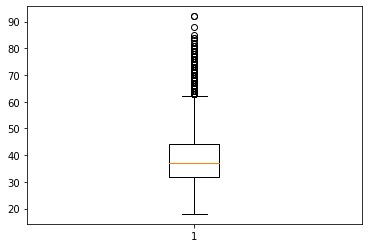

In [11]:
plt.boxplot(df.Age)
plt.show()

In [12]:
# we will clip top 2% of values of age 
thresh = df.Age.quantile(0.98)
df.Age[df.Age>thresh] = thresh

C:\Users\admin\AppData\Local\Temp/ipykernel_22052/1585860407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[df.Age>thresh] = thresh


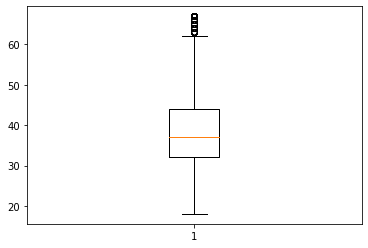

In [13]:
plt.boxplot(df.Age)
plt.show()

In [14]:
df.Age.skew()

0.7969670040641683

In [15]:
# drop some unwatned cols
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)
print(df.shape)

(10000, 11)


In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## 4. Exploraotry Data Analytics

  ### Data visualization
  #### Univariate Analysis
      - analyzing one variable at a time, without looking at contextual relation to target variable
      - numeric: histogram: continuous frequency distribution
      - categoric: barplot / countplot: discrete frequency distribution
      

In [19]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [20]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']



In [22]:
sns.set_theme()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


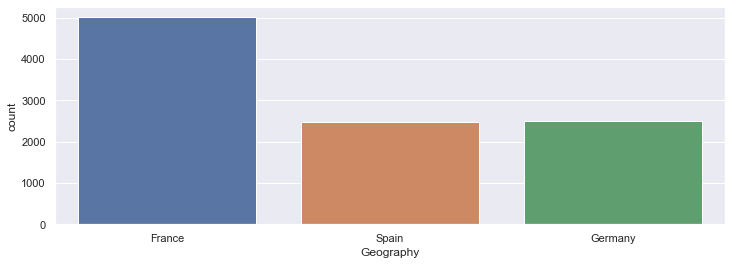

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


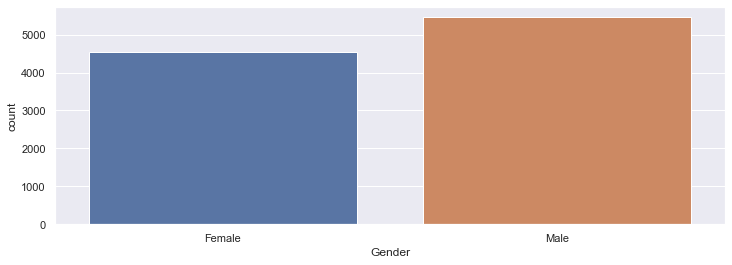

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


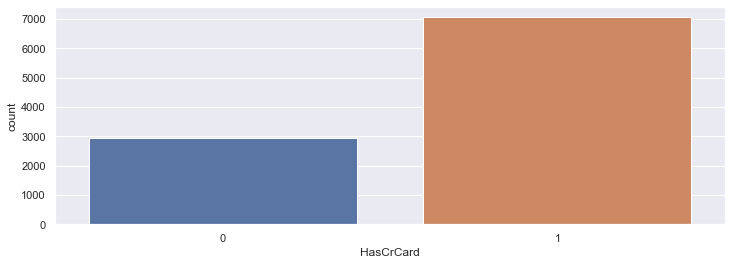

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


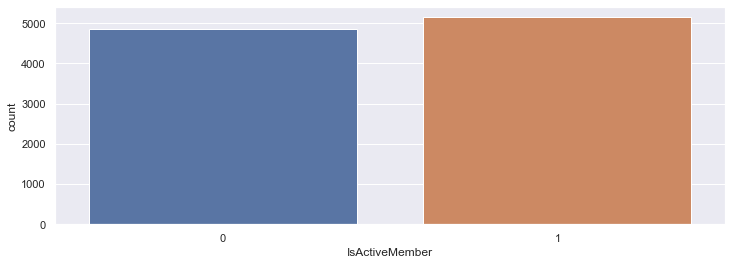

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


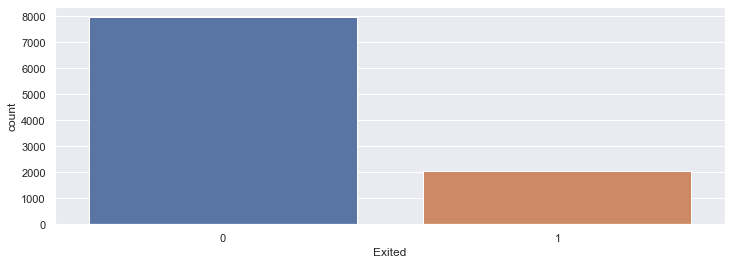

In [23]:
for col in cats:
    plt.figure(figsize=(12,4))
    sns.countplot(df[col])
    plt.show()

Observation:

    - Statistical interpretation: approx 50% of customers are from france, rest from spain & germany 
    - Business Inference: bank has been able to penetrate quite well in france but effectively in other regions
    - Recommendations: 
    
    - Gender: almost 50% of customers are male, rest are female
    - HasCrCard: almost 70% of customers have creditcard and 30% of them dont
    - IsActiveMember: approx 50% of customers are not actively  using banking products - RED FLAG
    - Exited: approx 20% of customers left the bank

In [24]:
# pip install plotly

In [25]:
import plotly.express as px

In [27]:
for col in nums:
    fig = px.histogram(df,x=col,width=800,height=400)
    fig.show()

Observations:
    
    - CreditScore: almost normal distribution, most customers have CS b/w 400 to 850, there are exceptionally high number of customers having CS b/w 850-854
    - age: almost normal distribution, skewed to right, most customers have age b/w 20 to 60
    - Tenure: almost uniform distribution
    - Balance: two groups/sections of customers, one approx 36% of customers having zero balance,
    other approx 67% of customers having balance b/w 50k to 200k
    - NumofProducts: almost 96% of custoemrs have either 1 or 2 products
    - Salary: almost uniform distribution

#### Bivariate Analysis

    - analyze each variable against the target variable
    - numeric v/s categoric = distplot = continuous probabitliy density distribution of numeric
    - categoric v/s categoric - barplot = discrete probabitliy distribution
    - numeric v/s numeric - scatterplot

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



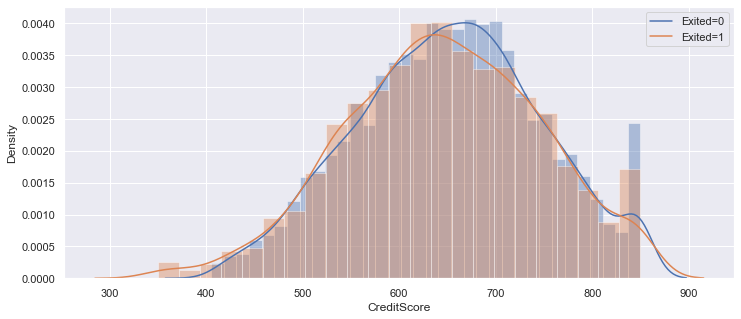

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



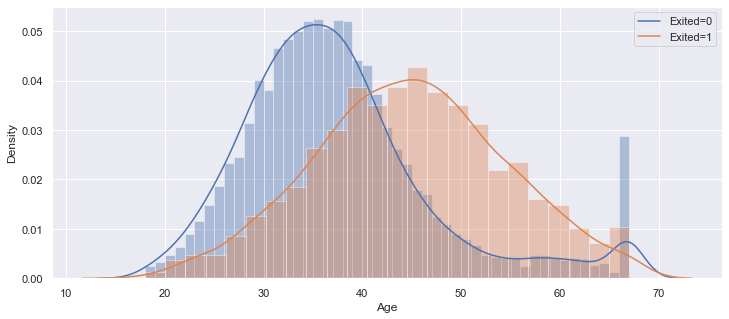

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



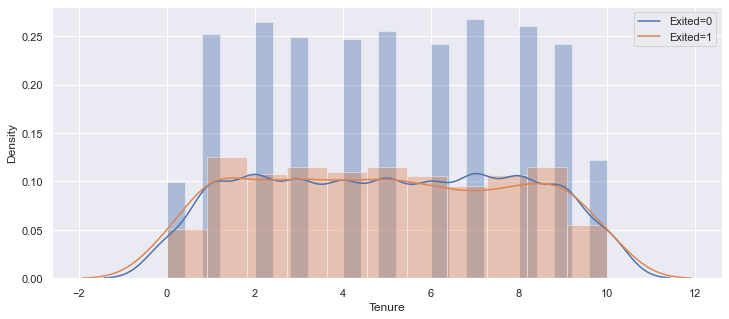

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



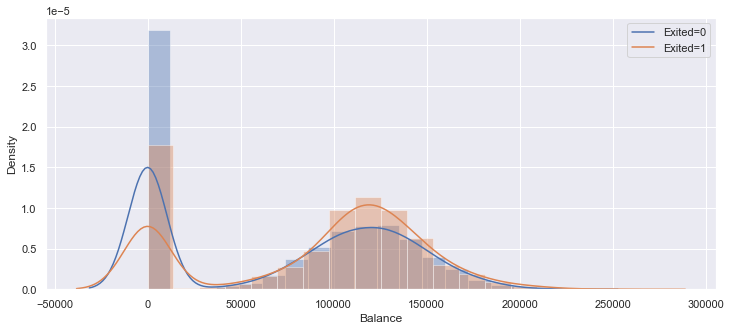

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



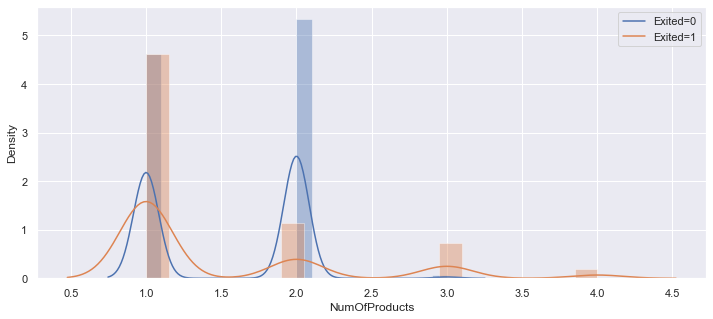

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



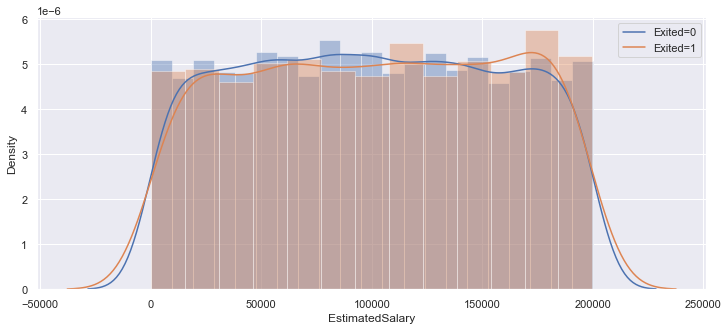

In [28]:
# numeric v/s categoric
for col in nums:
    plt.figure(figsize=(12,5))
    sns.distplot(df[col][df.Exited==0])
    sns.distplot(df[col][df.Exited==1])
    plt.legend(['Exited=0','Exited=1'])
    plt.show()